# Ejercicio1:
 Obtener los siguientes valores de una señal senoidal, una rampa, una onda cuadrada y una señal aleatoria.
1. Valor medio.
2. Maximo.
3. Minimo.
4. Amplitud.
5. Energia.
6. Accion.
7. Potencia media y
8. Raiz del valor cuadratico medio.


Medidas utiles Senoidal: 

Valor medio ->  -1.554312234475219e-16
Maximo ->  0.9510565162951554
Minimo ->  -0.9510565162951563
Amplitud ->  0.9510565162951554
Energia ->  49.999999999999986
Accion ->  -1.554312234475219e-14
Potencia Media ->  0.24999999999999992
RMS ->  0.4999999999999999
Medidas utiles Cuadrada: 

Valor medio ->  0.05
Maximo ->  1.0
Minimo ->  -1.0
Amplitud ->  1.0
Energia ->  80.0
Accion ->  4.0
Potencia Media ->  0.5
RMS ->  0.7071067811865476
Medidas utiles Rampa: 

Valor medio ->  0.49499999999999994
Maximo ->  0.99
Minimo ->  0.0
Amplitud ->  0.99
Energia ->  32.835
Accion ->  49.49999999999999
Potencia Media ->  0.16417500000000002
RMS ->  0.40518514286681345


Text(0, 0.5, 'Amplitud')

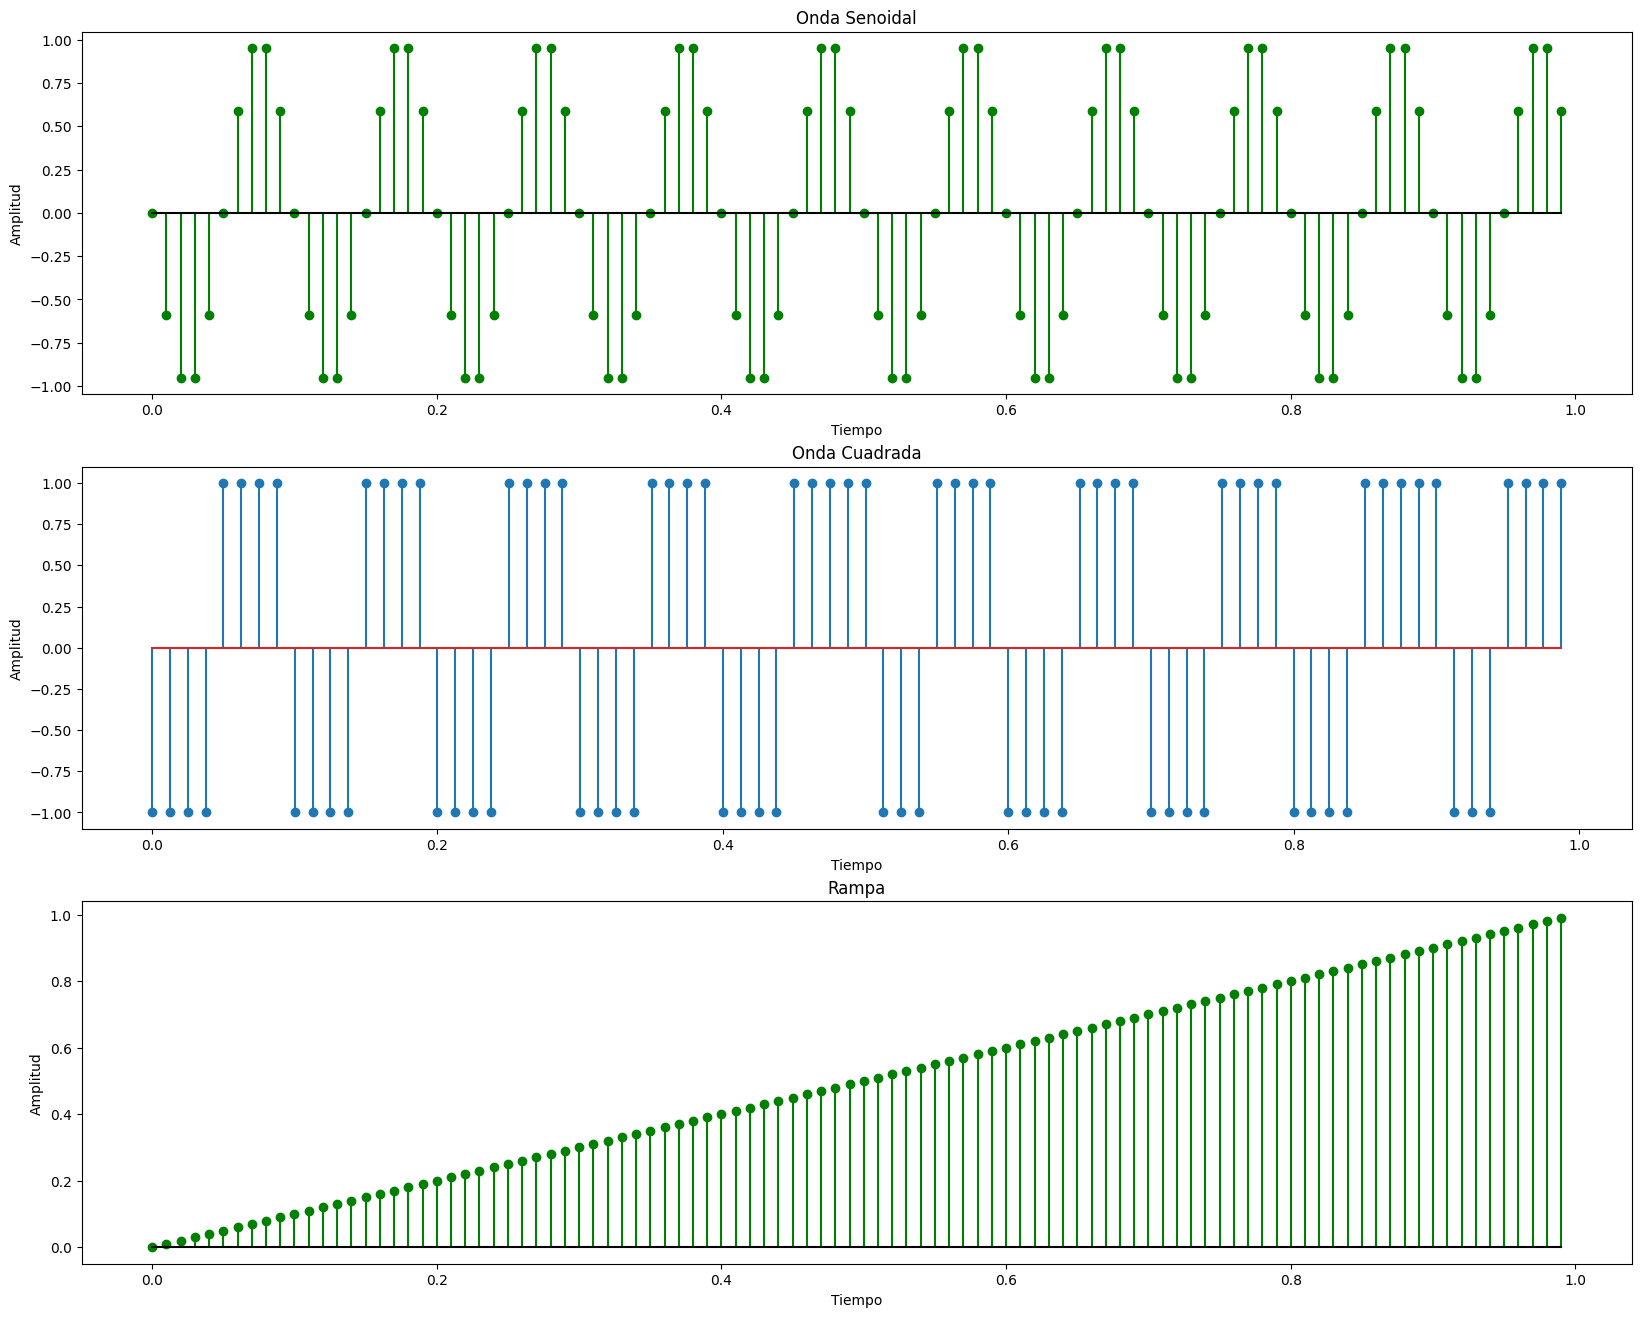

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#==========================================================================================
#==================================IMPLEMENTACION SEÑALES==================================
#==========================================================================================
def senoidal(tiempo_inicial, tiempo_final, frecuencia_senoidal, frecuencia_muestreo, fase):
    Ts = 1 / frecuencia_muestreo 
    t = np.arange(tiempo_inicial, tiempo_final, Ts)  
    y = np.sin(2 * np.pi * frecuencia_senoidal * t + fase)  
    return t, y

def onda_cuadrada(tiempo_inicial, tiempo_final, frecuencia_senoidal, frecuencia_muestreo, fase):
    T = 1/frecuencia_muestreo
    t = np.arange(tiempo_inicial,tiempo_final,T)
    y = np.zeros(len(t))

    for i in range(len(t)):
        if np.mod(2*np.pi*frecuencia_senoidal*t[i] + fase,2*np.pi) >= np.pi:
            y[i] = -1
        else:
            y[i] = 1

    return t, y

def rampa(tiempo_inicial, tiempo_final, paso):
    t = np.arange(tiempo_inicial, tiempo_final, paso)
    y = t * (t >= 0)
    return t, y

#==========================================================================================
#====================================MEDIDAS UTILES========================================
#==========================================================================================
def valor_medio(signal):
    valor_medio = np.average(signal)
    return valor_medio

def maximo(signal):
    return np.max(signal)

def minimo(signal):
    return np.min(signal)

#En el caso de una señal simetrica como la senoidal debe retornar lo mismo que maximo
def amplitud(signal):
    return np.abs(np.max(signal))

def energia(signal):
    energia = 0
    for i in range(len(signal)):
        energia += np.power(signal[i],2)
    return energia

def accion(signal):
    accion = np.sum(signal)
    #accion = 0
    #for i in range(len(signal)):
    #    accion += signal[i]
    return accion

def potencia_media(signal):
    norma = 0
    for i in range(len(signal)):
        norma += np.power(signal[i],2)
    
    pot_media = norma/(2*len(signal))
    return pot_media

def RMS(signal):
    pot = potencia_media(signal)
    RMS = np.sqrt(pot)
    return RMS

tiempo_senoidal, y_senoidal = senoidal(tiempo_inicial=0, tiempo_final=1, frecuencia_senoidal=10, frecuencia_muestreo=100,fase=np.pi)
print("Medidas utiles Senoidal: \n")
print("Valor medio -> ", valor_medio(y_senoidal))
print("Maximo -> ", maximo(y_senoidal))
print("Minimo -> ",minimo(y_senoidal))
print("Amplitud -> ",amplitud(y_senoidal))
print("Energia -> ",energia(y_senoidal))
print("Accion -> ",accion(y_senoidal))
print("Potencia Media -> ",potencia_media(y_senoidal))
print("RMS -> ",RMS(y_senoidal))
print("============================================================================================")

tiempo_cuadrada, y_cuadrada = onda_cuadrada(tiempo_inicial=0, tiempo_final=1, frecuencia_senoidal=10, frecuencia_muestreo=80,fase=np.pi)
print("Medidas utiles Cuadrada: \n")
print("Valor medio -> ", valor_medio(y_cuadrada))
print("Maximo -> ",maximo(y_cuadrada))
print("Minimo -> ",minimo(y_cuadrada))
print("Amplitud -> ",amplitud(y_cuadrada))
print("Energia -> ",energia(y_cuadrada))
print("Accion -> ",accion(y_cuadrada))
print("Potencia Media -> ",potencia_media(y_cuadrada))
print("RMS -> ",RMS(y_cuadrada))

print("============================================================================================")
y_rampa, tiempo_rampa = rampa(tiempo_inicial=0,tiempo_final=1,paso=.010)
print("Medidas utiles Rampa: \n")
print("Valor medio -> ", valor_medio(y_rampa))
print("Maximo -> ",maximo(y_rampa))
print("Minimo -> ",minimo(y_rampa))
print("Amplitud -> ",amplitud(y_rampa))
print("Energia -> ",energia(y_rampa))
print("Accion -> ",accion(y_rampa))
print("Potencia Media -> ",potencia_media(y_rampa))
print("RMS -> ",RMS(y_rampa))

plt.figure(figsize=(20, 16))

plt.subplot(3, 1, 1)
plt.stem(tiempo_senoidal, y_senoidal, linefmt='g-', markerfmt='go', basefmt='k-')
plt.title("Onda Senoidal")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")

plt.subplot(3, 1, 2)
plt.stem(tiempo_cuadrada, y_cuadrada)
plt.title("Onda Cuadrada")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")

plt.subplot(3, 1, 3)
plt.stem(tiempo_rampa, y_rampa, linefmt='g-', markerfmt='go', basefmt='k-')
plt.title("Rampa")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")

# Ejercicio 2
Compruebe que el producto interno mide el grado de parecido entre dos señales dadas. PAra ellos genere señales senoidales y realice el producto interno entre ellas. Evalúe el efecto que producen los distintos parámetros $(A,f,\phi)$ sobre el cálculo del producto interno.

Producto interno iguales:  49.99999999999999
Producto interno distinta frecuencia:  -3.086775000053988e-15
Producto interno distinta fase:  -40.45084971874735


<StemContainer object of 3 artists>

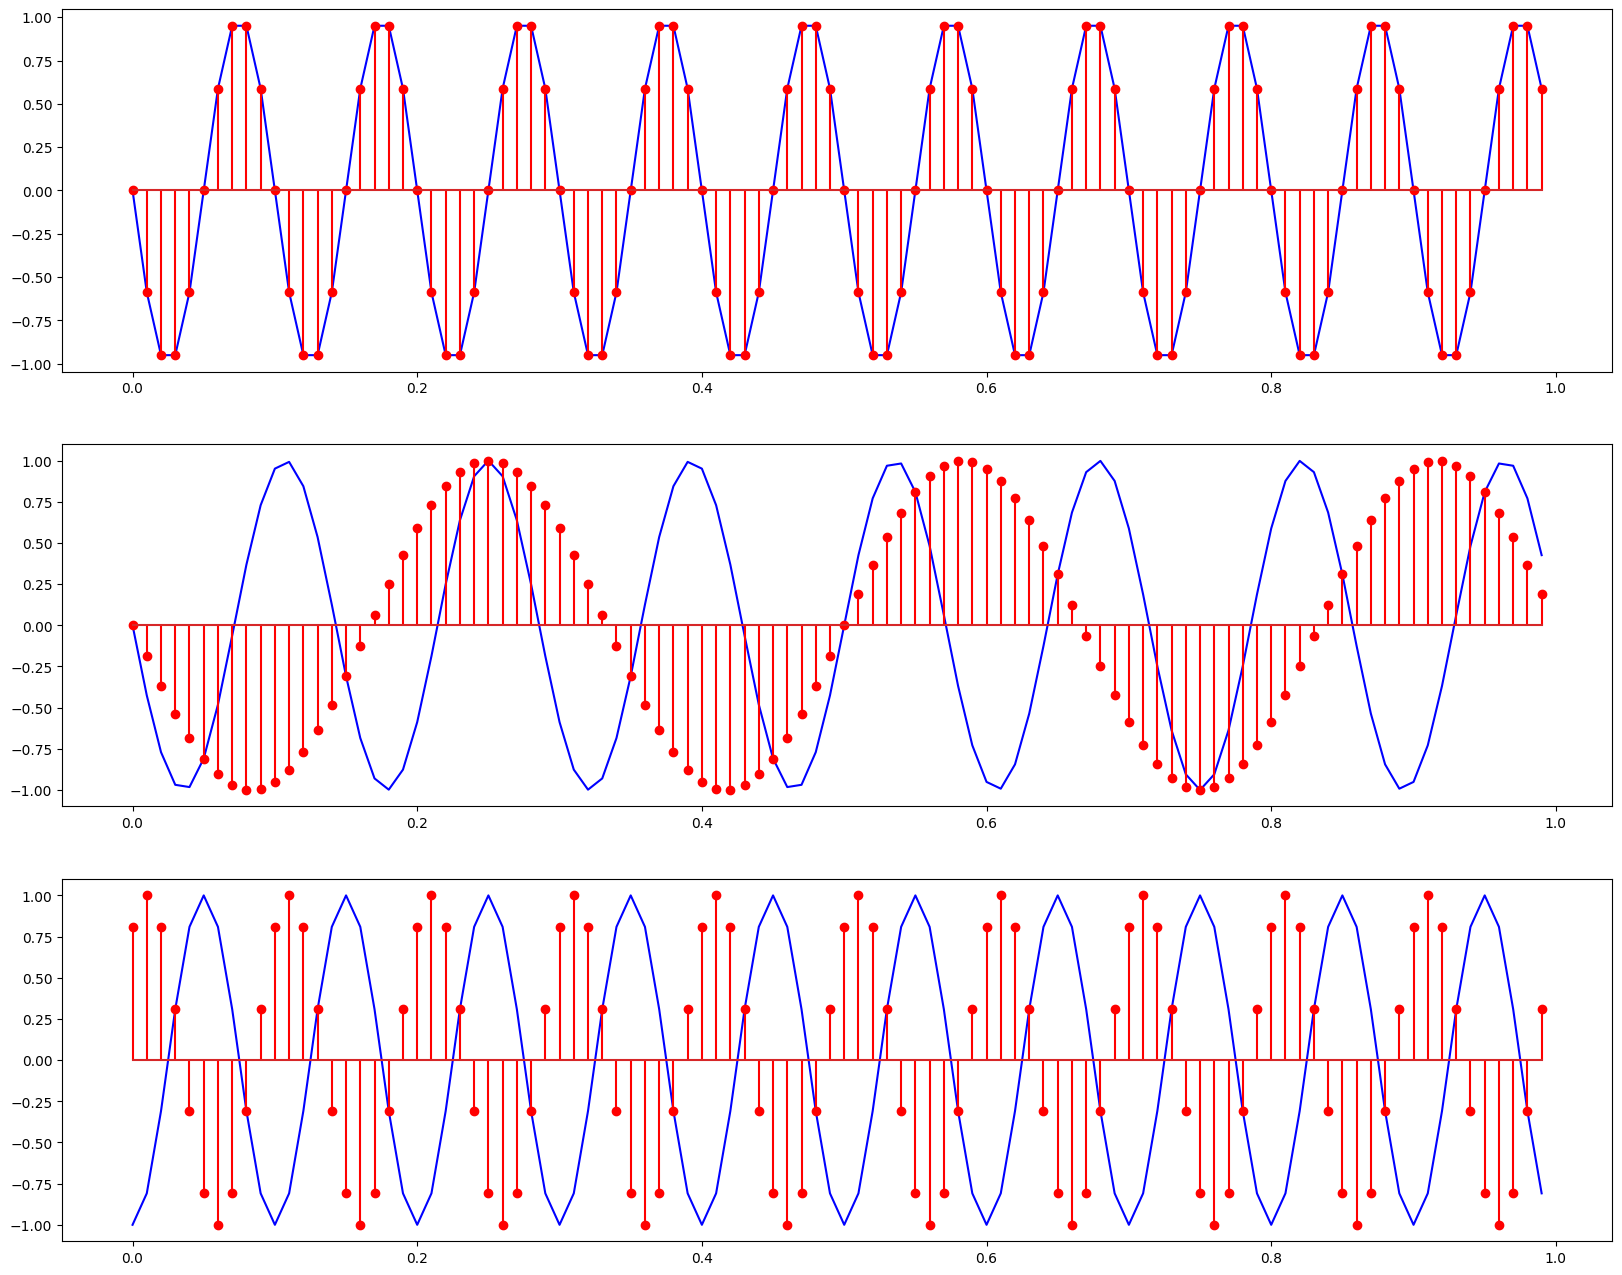

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def producto_interno(signal_a, signal_b):
    return signal_a @ signal_b

#Dos senoidales identicas
tiempo_senoidal1, y_senoidal1 = senoidal(tiempo_inicial=0, tiempo_final=1, frecuencia_senoidal=10, frecuencia_muestreo=100,fase=np.pi)
tiempo_senoidal2, y_senoidal2 = senoidal(tiempo_inicial=0, tiempo_final=1, frecuencia_senoidal=10, frecuencia_muestreo=100,fase=np.pi)
print("Producto interno iguales: ", producto_interno(y_senoidal1,y_senoidal2))

#Dos senoidales con distinta frecuencia
tiempo_senoidal1a, y_senoidal1a = senoidal(tiempo_inicial=0, tiempo_final=1, frecuencia_senoidal=7, frecuencia_muestreo=100,fase=np.pi)
tiempo_senoidal2a, y_senoidal2a = senoidal(tiempo_inicial=0, tiempo_final=1, frecuencia_senoidal=3, frecuencia_muestreo=100,fase=np.pi)
print("Producto interno distinta frecuencia: ",producto_interno(y_senoidal1a,y_senoidal2a))

#Dos senoidales con distinta fase
tiempo_senoidal1b, y_senoidal1b = senoidal(tiempo_inicial=0, tiempo_final=1, frecuencia_senoidal=10, frecuencia_muestreo=100,fase=1.5*np.pi)
tiempo_senoidal2b, y_senoidal2b = senoidal(tiempo_inicial=0, tiempo_final=1, frecuencia_senoidal=10, frecuencia_muestreo=100,fase=2.3*np.pi)
print("Producto interno distinta fase: ",producto_interno(y_senoidal1b,y_senoidal2b))

plt.figure(figsize=(20, 16))

plt.subplot(3, 1, 1)
plt.stem(tiempo_senoidal1, y_senoidal1, 'b-', label='Señal (a)')
plt.stem(tiempo_senoidal2, y_senoidal2, 'r-', label='Señal (b)')

plt.subplot(3, 1, 2)
plt.stem(tiempo_senoidal1a, y_senoidal1a, 'b-', label='Señal (a))')
plt.stem(tiempo_senoidal2a, y_senoidal2a, 'r-', label='Señal (b)')

plt.subplot(3, 1, 3)
plt.stem(tiempo_senoidal1b, y_senoidal1b, 'b-', label='Señal (a))')
plt.stem(tiempo_senoidal2b, y_senoidal2b, 'r-', label='Señal (b)')

# Ejercicio 4
Genere una señal como combinacion lineal del conjunto de señales senoidales con frecuencias de 1,2,3,4,5,6,7,8,9 y 10 Hz y luego: 
1. Mida el grado de parecido con dichas senoidales representando el resultado en un grafico de barras.
2. Vuelva a medir el grado de parecido pero con una combinacion lineal en la que se varia la fase de las senoidales.
3. Realice el grafico de barras para el caso de una señal cuadrada de 5.5 Hz

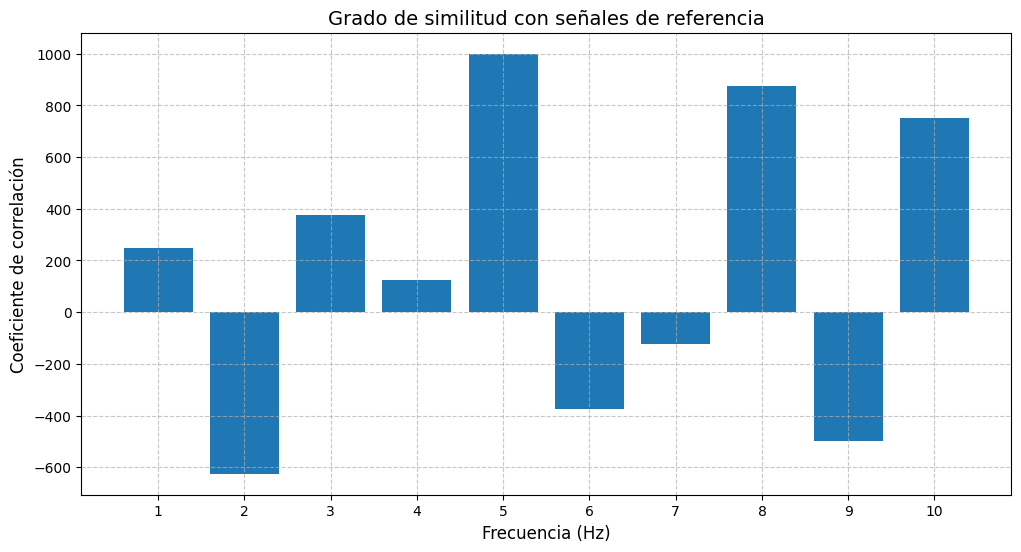

Text(0.5, 1.0, 'Grado de parecido de combinación lineal de senoidales (desfasadas)')

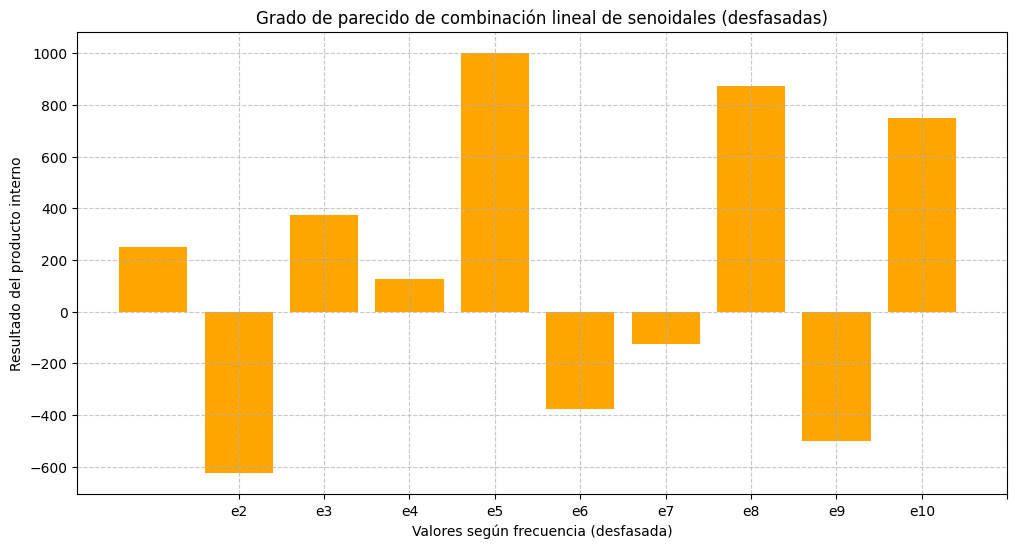

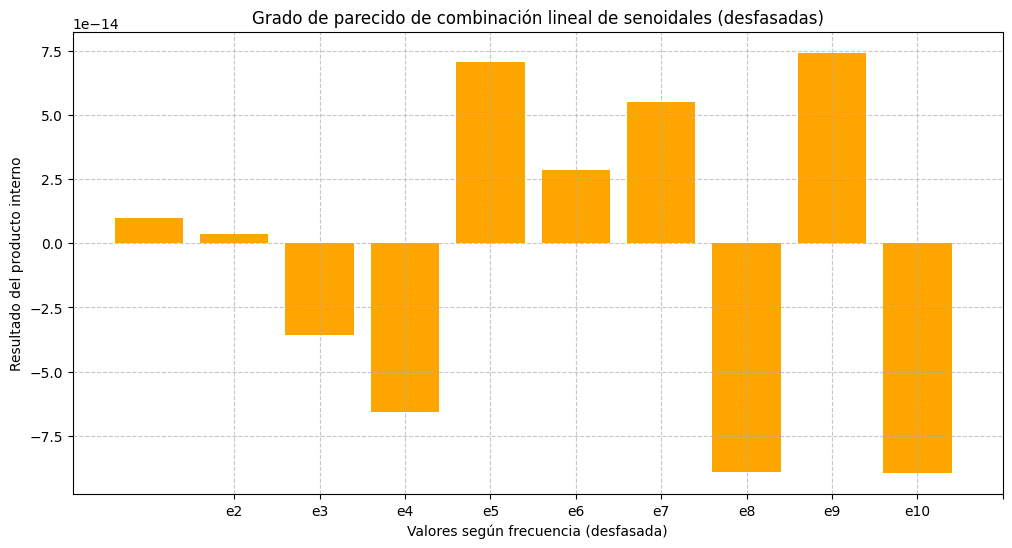

In [49]:
import numpy as np
import matplotlib.pyplot as plt

def senoidales(phi):
    res = [0]  # Índice 0 no usado (para empezar desde 1)
    ta = 0     # Tiempo inicial
    tb = 5     # Tiempo final
    fm = 50    # Frecuencia de muestreo (Hz)
    
    for i in range(1, 11):
        fs = i  # Frecuencia de la señal (1-10 Hz)
        current_phi = (fs-1)*(np.pi/2) if phi != 0 else 0
        _, aux = senoidal(ta, tb, fm, fs, current_phi)
        res.append(aux)
    return res

def senoidal_compuesta(a, phi):
    sins = senoidales(phi)
    y = np.sum([a[i-1] * sins[i] for i in range(1, 11)], axis=0)
    return y

#==========================================================================================
#=========================================INCISO (A)=======================================
#==========================================================================================

# Coeficientes y cálculo
coeficientes_a = np.array([2, -5, 3, 1, 8, -3, -1, 7, -4, 6])
compuesta = senoidal_compuesta(coeficientes_a, phi=0)
ref = senoidales(0)

#Cálculo de productos internos normalizados
prod_interno = []
for i in range(1, 11):
    # Producto interno normalizado (coeficiente de correlación)
    dot_product =  compuesta@ref[i]
    prod_interno.append(dot_product)

# Visualización
plt.figure(figsize=(12, 6))
plt.bar(range(1, 11), prod_interno)
plt.title("Grado de similitud con señales de referencia", fontsize=14)
plt.xlabel("Frecuencia (Hz)", fontsize=12)
plt.ylabel("Coeficiente de correlación", fontsize=12)
plt.xticks(range(1, 11))
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

#==========================================================================================
#=========================================INCISO (B)=======================================
#==========================================================================================
ref2 = senoidales(np.pi)
prod_interno2 = []
for i in range(1,11):
    prod_interno2.append(compuesta@ref2[i])

x_barras = ['e1','e2','e3','e4','e5','e6','e7','e8','e9','e10']
figure2 = plt.figure(figsize=(12, 6))
plt.bar(x_barras,prod_interno,color='orange') 
plt.xlabel('Valores según frecuencia (desfasada)')
plt.ylabel('Resultado del producto interno')
plt.xticks(range(1, 11))
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Grado de parecido de combinación lineal de senoidales (desfasadas)')

#==========================================================================================
#=========================================INCISO (C)=======================================
#==========================================================================================
_,y3 = onda_cuadrada(tiempo_inicial=0, tiempo_final=5, frecuencia_muestreo=50, frecuencia_senoidal=5.5, fase=0)
prod_interno = []
for i in range(1,11):
    prod_interno.append(y3@ref[i])

x_barras = ['e1','e2','e3','e4','e5','e6','e7','e8','e9','e10']
figure3 = plt.figure(figsize=(12, 6))
plt.bar(x_barras,prod_interno,color='orange') 
plt.xlabel('Valores según frecuencia (desfasada)')
plt.ylabel('Resultado del producto interno')
plt.xticks(range(1, 11))
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Grado de parecido de combinación lineal de senoidales (desfasadas)')

# Ejercicio 5
En el archivo te.txt se encuentra la señal registrada al discar un
numero telefonico en una linea ruidosa y se requiere determinar el numero
que se ha discado. La senal se digitalizo con una frecuencia de muestreo de
11025 Hz y se sabe que cada numero del telefono esta codiﬁcado mediante
la suma de dos senales senoidales cuya frecuencia indica la posicion en el
teclado. De arriba hacia abajo las frecuencias son 697, 770, 852 y 941 Hz; de
izquierda a derecha son 1209, 1336 y 1477 Hz. Por ejemplo: el numero 2 se
codiﬁca con la suma de dos senos con frecuencias 697 y 1336 Hz; el numero
7 se codiﬁca con 852 y 1209 Hz. Se necesita determinar el numero que se ha
discado. (Sugerencia: utilice el producto interno).

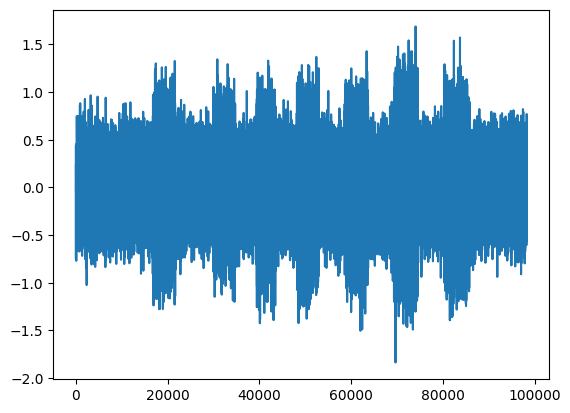

In [50]:
import numpy as np
import matplotlib.pyplot as plt

datos = np.loadtxt('te.txt')
n = np.arange(0,len(datos),1)
plt.plot(n,datos)
plt.show()